In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr as pearr

import torch
import torch.utils as utils
from torchvision import datasets, transforms

(25,) (31,)
(25,) (31,)


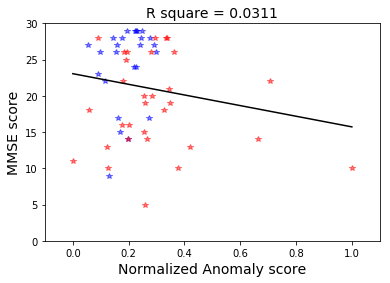

In [7]:
nm_output = np.load('roc_npy/nu0.975_hid64_iter90_output_nm.npy').reshape(-1)
ab_output = np.load('roc_npy/nu0.975_hid64_iter90_output_ab.npy').reshape(-1)
print(np.shape(nm_output), np.shape(ab_output))

nm_mmse = np.loadtxt('dataset/dongdong2/normal/normal_1/MMSE_1.txt')
ab_mmse = np.loadtxt('dataset/dongdong2/abnormal/abnormal_0/MMSE_0.txt')
print(np.shape(nm_mmse), np.shape(ab_mmse))

mmse_list = np.append(nm_mmse, ab_mmse)
score_list = np.append(nm_output, ab_output)
score_list = 1-((score_list - np.min(score_list))/(np.max(score_list)-np.min(score_list)))

plt.plot(score_list[:25], mmse_list[:25], 'b*', alpha=0.5)
plt.plot(score_list[25:], mmse_list[25:], 'r*', alpha=0.5)

line_fitter = LinearRegression()
line_fitter.fit(score_list.reshape(-1,1), mmse_list)
R_, _ = pearr(score_list, mmse_list)
rsqr = R_**2

a = np.min(score_list)
b = np.max(score_list)
plt.plot([a,b], line_fitter.predict(np.reshape([a,b],(-1,1))), 'k')
plt.xlabel('Normalized Anomaly score', fontsize=14)
plt.ylabel('MMSE score', fontsize=14)
plt.ylim(0,30)
plt.xlim(-0.1,1.1)
plt.title('R square = %.4f'%rsqr, fontsize=14)
# plt.savefig('mmse_img/mmse_plot_%.2f.png'%(k*0.05))
plt.show()